<a href="https://colab.research.google.com/github/gonzalo2sotomayor/Analisis-Cultivos-Agricolas/blob/main/analisis_cultivos_agricolas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1 - ETL** (Etracción, Transformación y Carga)



## A. Extracción

In [1]:
from google.colab import drive
import pandas as pd
import chardet

# Montar Google Drive
drive.mount('/content/drive', force_remount=True)

# Ruta del archivo en Drive
ruta_archivo = '/content/drive/MyDrive/DataInfo/cultivos/cultivos_agricolas.csv'

# Detección automática de codificación
with open(ruta_archivo, 'rb') as f:
    result = chardet.detect(f.read())

# Lectura del CSV
try:
  df = pd.read_csv(ruta_archivo, encoding=result['encoding'], sep=',', decimal='.')
  print('Extración de datos exitosa')
except FileNotFoundError:
  print(f'El archivo no se encuentra en la ruta: {ruta_archivo}')

Mounted at /content/drive
Extración de datos exitosa


## B. Transformación

In [2]:
# Información general y revisión inicial
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             1000000 non-null  float64
 4   Temperature_Celsius     1000000 non-null  float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         1000000 non-null  int64  
 9   Yield_tons_per_hectare  1000000 non-null  float64
 10  date                    1000000 non-null  object 
dtypes: bool(2), float64(3), int64(1), object(5)
memory usage: 70.6+ MB


In [3]:
# Información general y revisión inicial
df.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare,date
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816,25/05/2025
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341,11/03/2025
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443,29/11/2024
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573,18/05/2025
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251,02/01/2025


In [4]:
# Revisión de valores duplicados
print("Registros duplicados:", df.duplicated().sum())

Registros duplicados: 0


In [5]:
# Traducción de columnas al español
df = df.rename(columns={
    'Region': 'Region',
    'Soil_Type': 'Tipo_Suelo',
    'Crop': 'Cultivo',
    'Rainfall_mm': 'Lluvia_mm',
    'Temperature_Celsius': 'Temperatura_Celsius',
    'Fertilizer_Used': 'Uso_Fertilizante',
    'Irrigation_Used': 'Uso_Riego',
    'Weather_Condition': 'Condiciones_Meteorologicas',
    'Days_to_Harvest': 'Dias_hasta_la_Cosecha',
    'Yield_tons_per_hectare': 'Rendimiento_tonelada_por_hectarea',
    'date': 'Fecha',
    })

print("Columnas traducidas correctamente.")

Columnas traducidas correctamente.


In [6]:
# Conversión de columna 'Fecha' a formato datetime
df['Fecha'] = pd.to_datetime(df['Fecha'], dayfirst=True)

In [7]:
# Redondeo de variables numéricas para mejorar la legibilidad
df['Temperatura_Celsius'] = df['Temperatura_Celsius'].round(1)
df['Lluvia_mm'] = df['Lluvia_mm'].round(1)
df['Rendimiento_tonelada_por_hectarea'] = df['Rendimiento_tonelada_por_hectarea'].round(3)

In [8]:
# Verificación de categorías antes de traducir
print("Valores únicos antes de traducir:")
print("Region:", df['Region'].unique())
print("Tipo_Suelo:", df['Tipo_Suelo'].unique())
print("Cultivo:", df['Cultivo'].unique())
print("Condiciones_Meteorologicas:", df['Condiciones_Meteorologicas'].unique())
print("Uso_Fertilizante:", df['Uso_Fertilizante'].unique())
print("Uso_Riego:", df['Uso_Riego'].unique())

Valores únicos antes de traducir:
Region: ['West' 'South' 'North' 'East']
Tipo_Suelo: ['Sandy' 'Clay' 'Loam' 'Silt' 'Peaty' 'Chalky']
Cultivo: ['Cotton' 'Rice' 'Barley' 'Soybean' 'Wheat' 'Maize']
Condiciones_Meteorologicas: ['Cloudy' 'Rainy' 'Sunny']
Uso_Fertilizante: [False  True]
Uso_Riego: [ True False]


In [9]:
# Traducción de regiones
df['Region'] = df['Region'].replace({
    'North': 'Norte',
    'East': 'Este',
    'South': 'Sur',
    'West': 'Oeste'
})

# Traducción de tipo de suelo
df['Tipo_Suelo'] = df['Tipo_Suelo'].replace({
    'Sandy': 'Arenoso',
    'Clay': 'Arcilloso',
    'Loam': 'Franco',
    'Silt': 'Limoso',
    'Peaty': 'Turboso',
    'Chalky': 'Calcáreo'
})

# Traducción de cultivos
df['Cultivo'] = df['Cultivo'].replace({
    'Cotton': 'Algodón',
    'Rice': 'Arroz',
    'Maize': 'Maíz',
    'Barley': 'Cebada',
    'Wheat': 'Trigo',
    'Soybean': 'Soja'
})

# Traducción de condiciones meteorológicas
df['Condiciones_Meteorologicas'] = df['Condiciones_Meteorologicas'].replace({
    'Sunny': 'Soleado',
    'Rainy': 'Lluvioso',
    'Cloudy': 'Nublado'
})

# Traducción de valores booleanos
df['Uso_Fertilizante'] = df['Uso_Fertilizante'].replace({
    True: 'Sí',
    False: 'No'})

df['Uso_Riego'] = df['Uso_Riego'].replace({
    True: 'Sí',
    False: 'No'})

print("Traducciones de categorías completadas.")

Traducciones de categorías completadas.


In [10]:
# Creación de columna “Estación” derivada de la fecha
df['Estacion'] = df['Fecha'].dt.month.map({
    12: 'Verano', 1: 'Verano' , 2: 'Verano',
    3: 'Otoño', 4: 'Otoño', 5: 'Otoño',
    6: 'Invierno', 7: 'Invierno', 8: 'Invierno',
    9: 'Primavera', 10: 'Primavera', 11: 'Primavera'
})

print("Columna 'Estación' creada correctamente.")

Columna 'Estación' creada correctamente.


## C. Carga

In [11]:
ruta_salida = '/content/drive/MyDrive/DataInfo/cultivos/cultivos_agricolas_ok.csv'

# Guardar DataFrame transformado
df.to_csv(ruta_salida, index=False, sep=',')
print(f'Archivo guardado en: {ruta_salida}')

Archivo guardado en: /content/drive/MyDrive/DataInfo/cultivos/cultivos_agricolas_ok.csv


**Interpretación:**
- El proceso ETL permitió limpiar, traducir y estructurar un conjunto de datos agrícolas de 1 millón de registros.
- Las transformaciones garantizan coherencia semántica, tipos de datos correctos y facilidad para el análisis posterior.
- Además, la creación de la variable “Estación” permite enriquecer los análisis estacionales en la fase exploratoria.

# **2 - EDA** (Análisis Exploratorio de Datos)

## Análisis de la estructura del DataFrame

In [12]:
# Estructura y tipo de variables
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column                             Non-Null Count    Dtype         
---  ------                             --------------    -----         
 0   Region                             1000000 non-null  object        
 1   Tipo_Suelo                         1000000 non-null  object        
 2   Cultivo                            1000000 non-null  object        
 3   Lluvia_mm                          1000000 non-null  float64       
 4   Temperatura_Celsius                1000000 non-null  float64       
 5   Uso_Fertilizante                   1000000 non-null  object        
 6   Uso_Riego                          1000000 non-null  object        
 7   Condiciones_Meteorologicas         1000000 non-null  object        
 8   Dias_hasta_la_Cosecha              1000000 non-null  int64         
 9   Rendimiento_tonelada_por_hectarea  1000000 non-null  float64       
 10  Fecha  

,Region,Tipo_Suelo,Cultivo,Lluvia_mm,Temperatura_Celsius,Uso_Fertilizante,Uso_Riego,Condiciones_Meteorologicas,Dias_hasta_la_Cosecha,Rendimiento_tonelada_por_hectarea,Fecha,Estacion
0,Oeste,Arenoso,Algodón,897.1,27.7,No,Sí,Nublado,122,6.556,2025-05-25,Otoño
1,Sur,Arcilloso,Arroz,992.7,18.0,Sí,Sí,Lluvioso,140,8.527,2025-03-11,Otoño
2,Norte,Franco,Cebada,148.0,29.8,No,No,Soleado,106,1.127,2024-11-29,Primavera
3,Norte,Arenoso,Soja,986.9,16.6,No,Sí,Lluvioso,146,6.518,2025-05-18,Otoño
4,Sur,Limoso,Trigo,730.4,31.6,Sí,Sí,Nublado,110,7.248,2025-01-02,Verano


In [13]:
# Estadísticas descriptivas de variables numéricas
df.describe().round(2).T

,count,mean,min,25%,50%,75%,max,std
Lluvia_mm,1000000.0,549.98,100.0,324.9,550.1,774.7,1000.0,259.85
Temperatura_Celsius,1000000.0,27.5,15.0,21.3,27.5,33.8,40.0,7.22
Dias_hasta_la_Cosecha,1000000.0,104.5,60.0,82.0,104.0,127.0,149.0,25.95
Rendimiento_tonelada_por_hectarea,1000000.0,4.65,-1.15,3.42,4.65,5.88,9.96,1.7
Fecha,1000000,2025-03-18 13:47:57.494399488,2024-11-15 00:00:00,2024-12-15 00:00:00,2025-04-02 00:00:00,2025-05-09 00:00:00,2025-12-30 00:00:00,NaN


**Interpretación:**
- El DataFrame tiene 1.000.000 de registros y 12 columnas.
- Las columnas numéricas no tienen valores nulos y presentan rangos de valores amplios.
- Los datos están completos y son consistentes para análisis posteriores.

## Análisis de variables categóricas y relaciones iniciales

In [14]:
# Distribución de las principales variables categóricas
columnas_categoricas = ['Region', 'Tipo_Suelo', 'Cultivo', 'Condiciones_Meteorologicas', 'Estacion']

for col in columnas_categoricas:
    print(f"\nDistribución de {col}:")
    distribucion = df[col].value_counts().to_frame('Cantidad')
    distribucion['Porcentaje'] = (distribucion['Cantidad'] / distribucion['Cantidad'].sum() * 100).round(2)
    print(distribucion.head(10))


Distribución de Region:
        Cantidad  Porcentaje
Region                      
Norte     250173       25.02
Oeste     250074       25.01
Sur       250054       25.01
Este      249699       24.97

Distribución de Tipo_Suelo:
            Cantidad  Porcentaje
Tipo_Suelo                      
Arenoso       167119       16.71
Franco        166795       16.68
Calcáreo      166779       16.68
Limoso        166672       16.67
Arcilloso     166352       16.64
Turboso       166283       16.63

Distribución de Cultivo:
         Cantidad  Porcentaje
Cultivo                      
Maíz       166824       16.68
Arroz      166792       16.68
Cebada     166777       16.68
Trigo      166673       16.67
Algodón    166585       16.66
Soja       166349       16.63

Distribución de Condiciones_Meteorologicas:
                            Cantidad  Porcentaje
Condiciones_Meteorologicas                      
Soleado                       333790       33.38
Lluvioso                      333561       33.36
N

In [15]:
# Cultivo más frecuente por región
cultivos_regiones = df.groupby('Region')['Cultivo']
mayor_cultivo_regional = cultivos_regiones.agg(lambda x:x.value_counts().idxmax())

print("Cultivo más frecuente por Región:")
print(f"\n{mayor_cultivo_regional}")

Cultivo más frecuente por Región:

Region
Este      Soja
Norte    Trigo
Oeste     Maíz
Sur      Trigo
Name: Cultivo, dtype: object


In [16]:
# Rendimiento promedio por cultivo
redimiento_promedio_ph = df.groupby('Cultivo')['Rendimiento_tonelada_por_hectarea'].mean().sort_values(ascending=False)

print("Rendimiento promedio por cultivo (toneladas por hectárea):")
print(f"\n{redimiento_promedio_ph.round(3)}")

Rendimiento promedio por cultivo (toneladas por hectárea):

Cultivo
Soja       4.654
Trigo      4.653
Algodón    4.651
Arroz      4.651
Cebada     4.647
Maíz       4.641
Name: Rendimiento_tonelada_por_hectarea, dtype: float64


In [17]:
# Rendimiento promedio según uso de riego y cultivo
rendimiento_riego_cultivo = df.groupby(['Uso_Riego', 'Cultivo'])['Rendimiento_tonelada_por_hectarea'].mean().round(2).unstack()

print("\nRendimiento promedio (tonelada por hectarea) según uso de riego y cultivo:")
print(rendimiento_riego_cultivo)


Rendimiento promedio (tonelada por hectarea) según uso de riego y cultivo:
Cultivo    Algodón  Arroz  Cebada  Maíz  Soja  Trigo
Uso_Riego                                           
No            4.05   4.05    4.05  4.04  4.05   4.06
Sí            5.25   5.26    5.24  5.24  5.26   5.25


In [18]:
# Rendimiento promedio según uso de fertilizante y cultivo
rendimiento_fertilizante_cultivo = df.groupby(['Uso_Fertilizante', 'Cultivo'])['Rendimiento_tonelada_por_hectarea'].mean().round(2).unstack()

print("\nRendimiento promedio (tonelada por hectarea) según uso de riego y cultivo:")
print(rendimiento_fertilizante_cultivo)


Rendimiento promedio (tonelada por hectarea) según uso de riego y cultivo:
Cultivo           Algodón  Arroz  Cebada  Maíz  Soja  Trigo
Uso_Fertilizante                                           
No                    3.9    3.9    3.89  3.90  3.91    3.9
Sí                    5.4    5.4    5.41  5.39  5.40    5.4


In [19]:
# Rendimiento combinado por cultivo, tipo de suelo y estación
rendimiento_combinado = pd.pivot_table(
    df,
    values='Rendimiento_tonelada_por_hectarea',
    index=['Cultivo', 'Tipo_Suelo'],
    columns='Estacion',
    aggfunc='mean'
).round(3)

rendimiento_combinado.columns.name = None

print("Rendimiento promedio por Cultivo, Tipo de Suelo y Estación:")
display(rendimiento_combinado)

Rendimiento promedio por Cultivo, Tipo de Suelo y Estación:


Invierno  Otoño  Primavera  Verano
Cultivo Tipo_Suelo                                    
Algodón Arcilloso      4.637  4.647        NaN     NaN
        Arenoso        4.694  4.642        NaN     NaN
        Calcáreo       4.653  4.666        NaN     NaN
        Franco         4.643  4.632        NaN     NaN
        Limoso         4.683  4.658        NaN     NaN
        Turboso        4.654  4.646        NaN     NaN
Arroz   Arcilloso        NaN  4.646        NaN     NaN
        Arenoso          NaN  4.654        NaN     NaN
        Calcáreo         NaN  4.641        NaN     NaN
        Franco           NaN  4.652        NaN     NaN
        Limoso           NaN  4.654        NaN     NaN
        Turboso          NaN  4.658        NaN     NaN
Cebada  Arcilloso        NaN    NaN      4.670   4.631
        Arenoso          NaN    NaN      4.652   4.667
        Calcáreo         NaN    NaN      4.643   4.658
        Franco           NaN    NaN      4.660   4.624
        Limoso           NaN    NaN      4.641   4.618
        Turboso          NaN    NaN      4.651   4.649
Maíz    Arcilloso      4.629  4.607      4.646   4.639
        Arenoso        4.649  4.612      4.632   4.639
        Calcáreo       4.677  4.645      4.662   4.628
        Franco         4.669  4.688      4.651   4.660
        Limoso         4.628  4.601      4.631   4.658
        Turboso        4.618  4.653      4.644   4.627
Soja    Arcilloso        NaN  4.651        NaN     NaN
        Arenoso          NaN  4.656        NaN     NaN
        Calcáreo         NaN  4.658        NaN     NaN
        Franco           NaN  4.640        NaN     NaN
        Limoso           NaN  4.656        NaN     NaN
        Turboso          NaN  4.662        NaN     NaN
Trigo   Arcilloso        NaN    NaN      4.647   4.644
        Arenoso          NaN    NaN      4.641   4.636
        Calcáreo         NaN    NaN      4.649   4.652
        Franco           NaN    NaN      4.652   4.678
        Limoso           NaN    NaN      4.659   4.658
        Turboso          NaN    NaN      4.642   4.659

**Interpretación:**
- Este análisis permite comprender la distribución de los principales factores agrícolas (región, tipo de suelo, estación y condiciones meteorológicas) y su impacto sobre el rendimiento.
- Se observa que algunos cultivos predominan en regiones específicas, y que tanto el uso de riego como de fertilizante aumentan el rendimiento promedio, aunque su efecto varía según el tipo de cultivo.
- La tabla combinada evidencia que las interacciones entre cultivo, suelo y estación influyen significativamente en la productividad, lo que sugiere oportunidades para optimizar la asignación de recursos según las condiciones locales.

## Preguntas de Negocio



### Pregunta 1: ¿Qué combinación de factores (riego y fertilizante) genera mayor rendimiento promedio?

In [20]:
# Aplicación del método groupby() para analizar el rendimiento promedio por combinación de factores: riego y fertilizante.
combinacion_factores = df.groupby(['Uso_Riego', 'Uso_Fertilizante'])

mejor_combinacion_rendimiento = combinacion_factores['Rendimiento_tonelada_por_hectarea'].mean().round(2).sort_values(ascending=False)

print("Mejor combinación de factores para el rendimiento promedio:")
display(mejor_combinacion_rendimiento)

Mejor combinación de factores para el rendimiento promedio:


,,Rendimiento_tonelada_por_hectarea
Uso_Riego,Uso_Fertilizante,
Sí,Sí,6.0
No,Sí,4.8
Sí,No,4.5
No,No,3.3


**Interpretación:**
- El análisis muestra cómo la combinación del uso de riego y fertilizante impacta en el rendimiento agrícola.
Se observa que las parcelas donde se aplican ambos factores (riego y fertilizante) presentan un rendimiento promedio superior respecto a las que solo usan uno o ninguno.
Esto sugiere que el manejo conjunto de riego y fertilización optimiza la productividad del cultivo, confirmando la importancia de una gestión integral de recursos hídricos y nutrientes en la agricultura.

### Pregunta 2: ¿Cómo varía el rendimiento de cada tipo de suelo bajo diferentes condiciones meteorológicas (Soleado, Lluvioso, Nublado)?

In [21]:
# Uso del método pivot_table() para analizar el rendimiento promedio según el tipo de suelo y las condiciones meteorológicas.
rendimiento_suelo_clima = pd.pivot_table(
    df,
    values='Rendimiento_tonelada_por_hectarea',
    index='Tipo_Suelo',
    columns='Condiciones_Meteorologicas',
    aggfunc='mean'
).round(3)

rendimiento_suelo_clima.columns.name = None

print("Rendimiento promedio por tipo de suelo y condiciones meteorológicas:")
display(rendimiento_suelo_clima)

Rendimiento promedio por tipo de suelo y condiciones meteorológicas:


,Lluvioso,Nublado,Soleado
Tipo_Suelo,,,
Arcilloso,4.635,4.649,4.650
Arenoso,4.646,4.645,4.654
Calcáreo,4.654,4.639,4.665
Franco,4.654,4.652,4.648
Limoso,4.650,4.647,4.648
Turboso,4.656,4.651,4.645


**Interpretación:**
- La tabla muestra el rendimiento promedio (toneladas por hectárea) según el tipo de suelo y las condiciones meteorológicas.
Se observa que algunos suelos, como el franco o el limoso, mantienen un rendimiento estable ante distintas condiciones climáticas, mientras que suelos como el arenoso o calcáreo presentan mayores variaciones.
En general, las condiciones soleadas suelen estar asociadas a un mejor rendimiento promedio.
Este análisis permite identificar combinaciones de suelo y clima más favorables para optimizar la productividad agrícola.

### Pregunta 3: ¿Cómo varía el rendimiento promedio por cultivo a lo largo del tiempo?

Promedio de rendimiento (toneladas/ha) por mes y cultivo:


Cultivo,Algodón,Arroz,Cebada,Maíz,Soja,Trigo
Mes,,,,,,
1,NaN,NaN,NaN,4.636,NaN,4.645
2,NaN,NaN,NaN,4.653,NaN,NaN
3,NaN,4.655,NaN,4.628,NaN,NaN
4,4.648,4.641,NaN,4.632,4.649,NaN
5,4.649,NaN,NaN,4.643,4.658,NaN
6,4.661,NaN,NaN,4.632,NaN,NaN
7,NaN,NaN,NaN,4.655,NaN,NaN
8,NaN,NaN,NaN,4.648,NaN,NaN
9,NaN,NaN,NaN,4.652,NaN,NaN


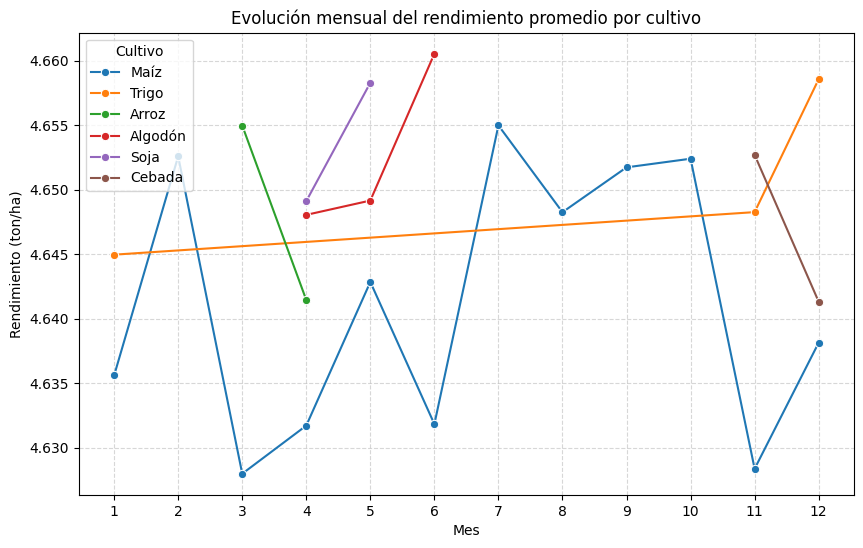

In [24]:
# Aplicación del método groupby() para analizar el rendimiento promedio por combinación de factores: riego y fertilizante.
df['Mes'] = df['Fecha'].dt.month
rendimiento_mensual = df.groupby(['Mes','Cultivo'])['Rendimiento_tonelada_por_hectarea'].mean().reset_index()

# Tabla de promedios
tabla_rendimiento_mensual = rendimiento_mensual.pivot(index='Mes', columns='Cultivo', values='Rendimiento_tonelada_por_hectarea').round(3)

print("Promedio de rendimiento (toneladas/ha) por mes y cultivo:")
display(tabla_rendimiento_mensual.head(12))
print("\n")

# Vizualización con gráfico de línes
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.lineplot(data=rendimiento_mensual, x='Mes', y='Rendimiento_tonelada_por_hectarea', hue='Cultivo', marker='o')
plt.title('Evolución mensual del rendimiento promedio por cultivo')
plt.xlabel('Mes')
plt.ylabel('Rendimiento (ton/ha)')
plt.legend(title='Cultivo')
plt.xticks(range(1, 13))
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

**Interpretación:**
- El análisis de la evolución temporal del rendimiento muestra comportamientos diferenciados entre cultivos. Se observa que algunos presentan rendimientos más altos en meses específicos, evidenciando una clara estacionalidad productiva.
Este patrón puede asociarse tanto a las condiciones climáticas predominantes como al tipo de suelo y prácticas de manejo aplicadas.
Cultivos con curvas más estables sugieren una mayor adaptabilidad, mientras que aquellos con fluctuaciones marcadas podrían requerir ajustes en su calendario de siembra o en el uso de riego y fertilizantes.
En conjunto, esta información es valiosa para optimizar la planificación agrícola y maximizar el rendimiento total anual.